In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan.csv')

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

### Data Cleaning

In [6]:
list_of_columns_to_drop=['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint',
                         'tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
                         'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
                         'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal',
                         'bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
                         'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
                         'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
                         'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
                         'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq',
                         'percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

In [7]:
df.drop(list_of_columns_to_drop,inplace=True,axis=1)

In [8]:
df.shape

(39717, 57)

In [9]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,39717.0,39717,39717.0,39661.0,39717.0,39020.000000,39678.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,NaN,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,NaN,22.088828,NaN,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,NaN,2678.826162,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,0.491812,NaN,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,NaN,11.401709,NaN,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,NaN,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,0.000000,NaN,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,NaN,13.000000,NaN,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,NaN,218.680000,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,0.000000,NaN,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,NaN,20.0

In [10]:
print(df['id'].duplicated().any())
print(df['member_id'].duplicated().any())
print(df['url'].duplicated().any())
print(df['pymnt_plan'].duplicated().any(),df['pymnt_plan'].unique())
print(df['initial_list_status'].duplicated().any(),df['initial_list_status'].unique())
print(df['acc_now_delinq'].duplicated().any(),df['acc_now_delinq'].unique())
print(df['application_type'].duplicated().any(),df['application_type'].unique())
print(df['chargeoff_within_12_mths'].duplicated().any(),df['chargeoff_within_12_mths'].unique())
print(df['delinq_amnt'].duplicated().any(),df['delinq_amnt'].unique())
print(df['tax_liens'].duplicated().any(),df['tax_liens'].unique())


False
False
False
True ['n']
True ['f']
True [0]
True ['INDIVIDUAL']
True [ 0. nan]
True [0]
True [ 0. nan]


In [11]:
#Dropping unique values
df.drop(['id','member_id','url','pymnt_plan','initial_list_status','acc_now_delinq','application_type',
         'chargeoff_within_12_mths','delinq_amnt','tax_liens','collections_12_mths_ex_med'],inplace=True,axis=1)

In [12]:
df.isnull().sum()/df.shape[0]*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
p

In [13]:
#Removing Columns having more than 90% Null Values
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],inplace=True,axis=1)

In [14]:
df.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715,39717.0,39020.000000
unique,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106,NaN,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,NaN,NaN
freq,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,10308,NaN,NaN
mean,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,NaN,0.869200,9.294408,0.055065,13382.528086,NaN,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,NaN,2678.826162,NaN,1.0,0.043260
std,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,0.491812,NaN,1.070219,4.400282,0.237200,15885.016641,NaN,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN,0.0,0.204324
min,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.0,0.000000
25%,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,NaN,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,0.000000,NaN,0.000000,6.000000,0.000000,3703.000000,NaN,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,NaN,218.680000,NaN,1.0,0.000000
50%,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,0.000000,NaN,1.000000,9.000000,0.000000,8850.000000,NaN,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,NaN,546.140000,NaN,1.0,0.000000
75%,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,NaN,NaN,NaN,8.230000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.600000,0.000000,NaN,1.000000,12.000000,0.000000,17058.000000,NaN,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,NaN,3293.160000,NaN,1.0,0.000000


In [15]:
df.duplicated().any()

False

######  There are no duplicated rows in the dataset

In [16]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [17]:
df=df[df['loan_status']!='Current']

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df['Fully_Paid']=df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

In [20]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [21]:
df['Fully_Paid'].value_counts()

1    32950
0     5627
Name: Fully_Paid, dtype: int64

In [22]:
df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_

In [23]:
df['emp_title']=df['emp_title'].fillna('None')
df['emp_title'].isnull().sum()

0

In [24]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [25]:
df['emp_length']=df['emp_length'].fillna('UnKnown')
df['emp_length'].isnull().sum()

0

In [26]:
print('No.of Null Values before Cleaning ',df['title'].isnull().sum())
print("Number of Differernt Titles are: ",len(df['title'].unique()))
df['title']=df['title'].fillna('UnKnown')
print('No.of Null Values after Cleaning ',df['title'].isnull().sum())

No.of Null Values before Cleaning  11
Number of Differernt Titles are:  19298
No.of Null Values after Cleaning  0


In [27]:
df['pub_rec_bankruptcies'].value_counts()
df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [28]:
df.shape

(38577, 43)

In [29]:
df.dropna(subset=['last_pymnt_d','revol_util','last_credit_pull_d'],inplace=True)

In [30]:
df.drop('desc',axis=1,inplace=True)

In [31]:
df.shape

(38458, 42)

In [32]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

In [33]:
df['int_rate']=df['int_rate'].apply(lambda x:float(x.strip('%')))

In [34]:
df['issue_d']=pd.to_datetime(df['issue_d'],format='%b-%y')

In [35]:
df['issue_year']=df.issue_d.dt.year
df['issue_month']=df.issue_d.dt.month
df.drop(['issue_d'],axis=1,inplace=True)

In [36]:
df['annual_inc'].describe()

count    3.845800e+04
mean     6.884550e+04
std      6.425580e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [37]:
df['annual_inc'].mean()

68845.5024624266

In [38]:
df['annual_inc'].max()

6000000.0

Text(0, 0.5, 'Density')

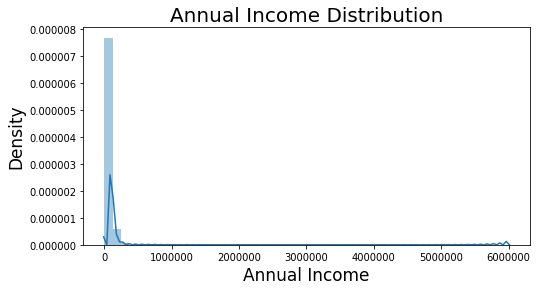

In [39]:
plt.figure(figsize=(8,4))
sns.distplot(df['annual_inc'])
plt.title("Annual Income Distribution", fontsize=20)
plt.xlabel("Annual Income", fontsize=17)
plt.ylabel("Density", fontsize=17)

In [40]:
num=np.quantile(df['annual_inc'],0.99)
df=df[df['annual_inc']<num]

Text(0, 0.5, 'Density')

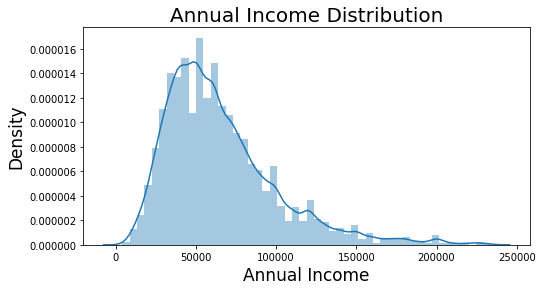

In [41]:
plt.figure(figsize=(8,4))
sns.distplot(df['annual_inc'])
plt.title("Annual Income Distribution", fontsize=20)
plt.xlabel("Annual Income", fontsize=17)
plt.ylabel("Density", fontsize=17)

In [42]:
df['annual_inc'].describe()

count     38073.000000
mean      65380.939929
std       35150.175534
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [43]:
df['income_range']=df['annual_inc'].apply(lambda x:'low' if x<40000 else 'medium' if x>40000 and x<80400 else 'High')

In [44]:
df['income_range'].value_counts()

medium    18909
High      10384
low        8780
Name: income_range, dtype: int64

### Univariate Analysis

In [45]:
data=sorted(df['annual_inc'],reverse=True)
data={'rank':np.arange(1,len(data)+1).astype('int'),'annual_income':data}
data=pd.DataFrame(data)
data.head()

,rank,annual_income
0,1,234000.0
1,2,234000.0
2,3,234000.0
3,4,234000.0
4,5,233004.0


Text(0, 0.5, 'Loan Amount')

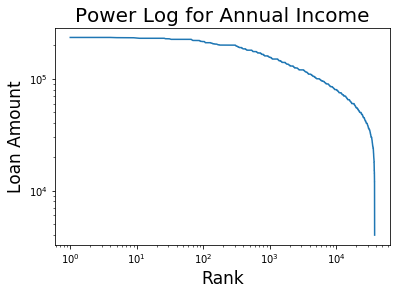

In [46]:
sns.lineplot(x=data['rank'],y=data['annual_income'])
plt.yscale('log')
plt.xscale('log')
plt.title("Power Log for Annual Income", fontsize=20)
plt.xlabel("Rank", fontsize=17)
plt.ylabel("Loan Amount", fontsize=17)

Text(0, 0.5, 'Intrest Rate')

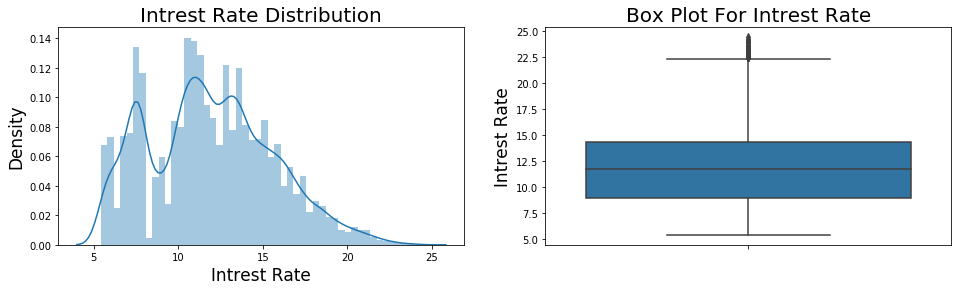

In [47]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['int_rate'])
plt.title("Intrest Rate Distribution", fontsize=20)
plt.xlabel("Intrest Rate", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(y=df['int_rate'])
plt.title("Box Plot For Intrest Rate", fontsize=20)
plt.ylabel("Intrest Rate", fontsize=17)

In [48]:
df['loan_amnt'].describe()

count    38073.000000
mean     10974.907415
std       7264.423553
min        500.000000
25%       5275.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

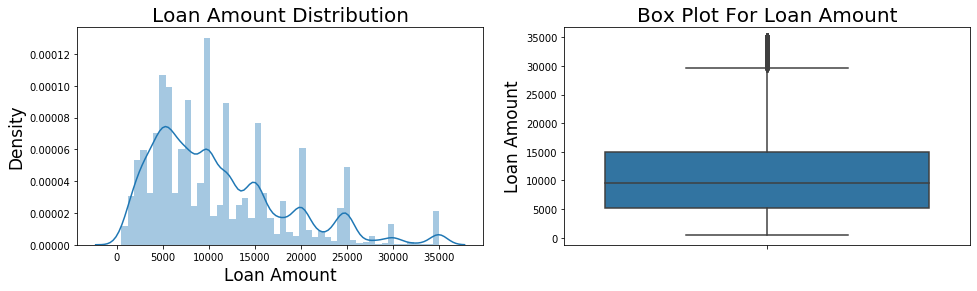

In [49]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['loan_amnt'])
plt.title("Loan Amount Distribution", fontsize=20)
plt.xlabel("Loan Amount", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(y=df['loan_amnt'])
plt.title("Box Plot For Loan Amount", fontsize=20)
plt.ylabel("Loan Amount", fontsize=17)

Text(0, 0.5, 'Value Count')

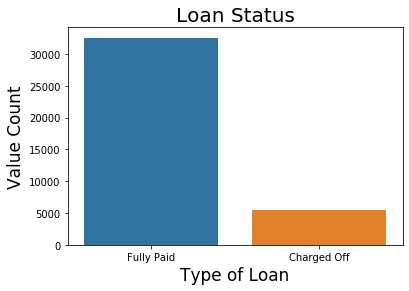

In [50]:
sns.countplot(x='loan_status',data=df)
plt.title("Loan Status", fontsize=20)
plt.xlabel("Type of Loan", fontsize=17)
plt.ylabel("Value Count", fontsize=17)

Text(0, 0.5, 'Installment')

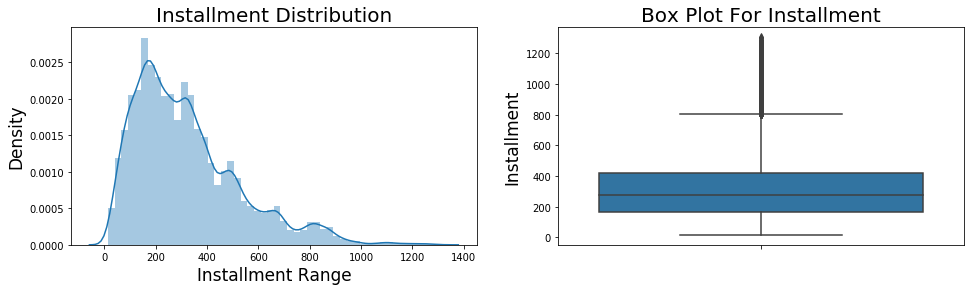

In [51]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(y='installment',data=df)
plt.title("Box Plot For Installment", fontsize=20)
plt.ylabel("Installment", fontsize=17)

Text(0, 0.5, 'Value count')

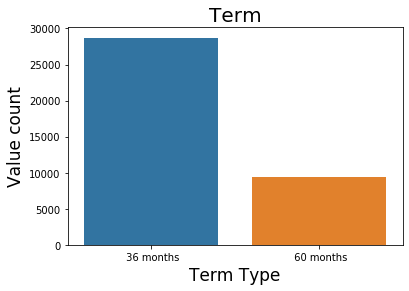

In [52]:
sns.countplot(x='term',data=df)
plt.title("Term", fontsize=20)
plt.xlabel("Term Type", fontsize=17)
plt.ylabel("Value count", fontsize=17)

### Bivariate/Mutivariate Analysis

In [53]:
df['annual_inc'].describe()

count     38073.000000
mean      65380.939929
std       35150.175534
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [54]:
df['income_range'].value_counts()

medium    18909
High      10384
low        8780
Name: income_range, dtype: int64

Text(0, 0.5, 'Installment')

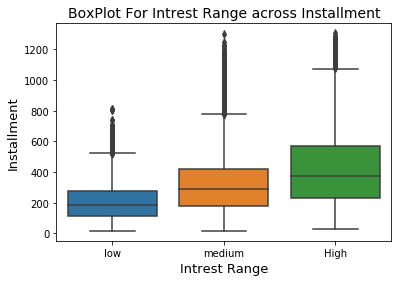

In [55]:
sns.boxplot(x='income_range',y='installment',data=df)
plt.title("BoxPlot For Intrest Range across Installment", fontsize=14)
plt.xlabel("Intrest Range", fontsize=13)
plt.ylabel("Installment", fontsize=13)

### We can see that the installment is rising as the Income Range is getting high

Text(0, 0.5, 'Loan Amount')

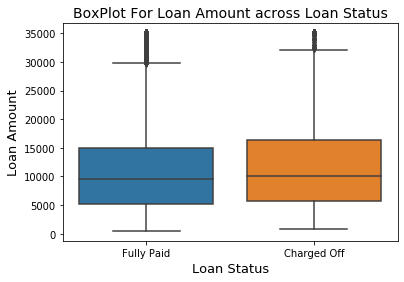

In [56]:
sns.boxplot(y='loan_amnt',x='loan_status',data=df)
plt.title("BoxPlot For Loan Amount across Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=13)
plt.ylabel("Loan Amount", fontsize=13)

### From the above diagram we can see that the median of loan_amount of charged-off people is high.

Text(0, 0.5, 'Installment')

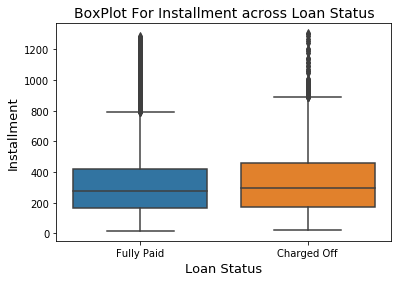

In [57]:
sns.boxplot(x=df['loan_status'],y=df['installment'])
#plt.yscale('log')
plt.title("BoxPlot For Installment across Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=13)
plt.ylabel("Installment", fontsize=13)

### From the above diagram we can see that the median of Installment of charged-off is high. 

Text(0, 0.5, 'Loan Amount')

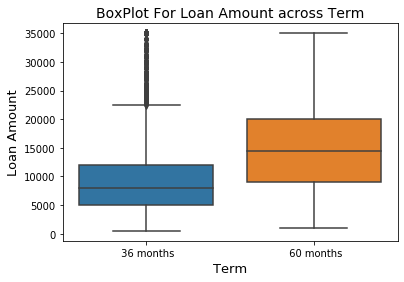

In [58]:
sns.boxplot(x=df['term'],y=df['loan_amnt'])
plt.title("BoxPlot For Loan Amount across Term", fontsize=14)
plt.xlabel("Term", fontsize=13)
plt.ylabel("Loan Amount", fontsize=13)

### We can see infer that the average Loan Amount of people whose term is 5 years is more

Text(0, 0.5, 'Open Account')

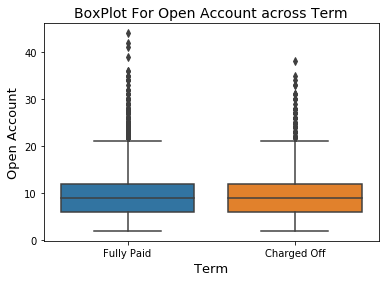

In [59]:
sns.boxplot(x=df['loan_status'],y=df['open_acc'])
plt.title("BoxPlot For Open Account across Term", fontsize=14)
plt.xlabel("Term", fontsize=13)
plt.ylabel("Open Account", fontsize=13)

Text(0, 0.5, 'Intrest Rate')

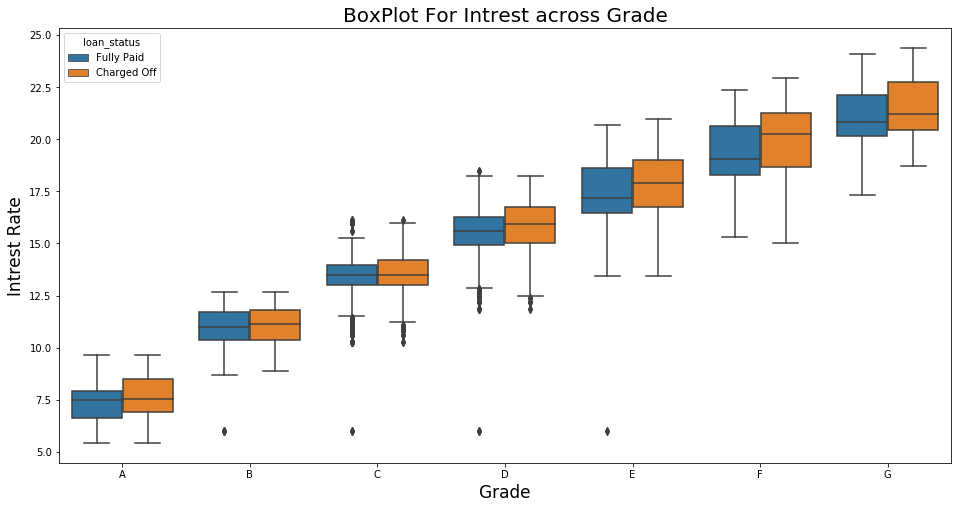

In [60]:
plt.figure(figsize=(16,8))
sns.boxplot(x='grade',y='int_rate',hue='loan_status',data=df,order=sorted(df['grade'].unique()))
plt.title("BoxPlot For Intrest across Grade", fontsize=20)
plt.xlabel("Grade", fontsize=17)
plt.ylabel("Intrest Rate", fontsize=17)

Text(0, 0.5, 'Intrest Rate')

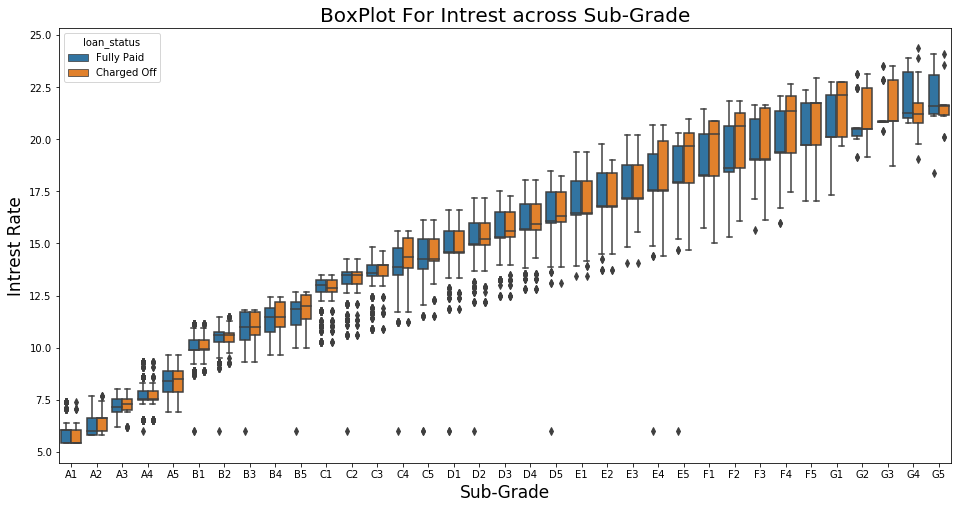

In [61]:
plt.figure(figsize=(16,8))
sns.boxplot(x='sub_grade',y='int_rate',hue='loan_status',data=df,order=sorted(df['sub_grade'].unique()))
plt.title("BoxPlot For Intrest across Sub-Grade", fontsize=20)
plt.xlabel("Sub-Grade", fontsize=17)
plt.ylabel("Intrest Rate", fontsize=17)

### We can infer from the above two graphs that the median of intrest is gradually increasing from A to G 

Text(0, 0.5, 'Count')

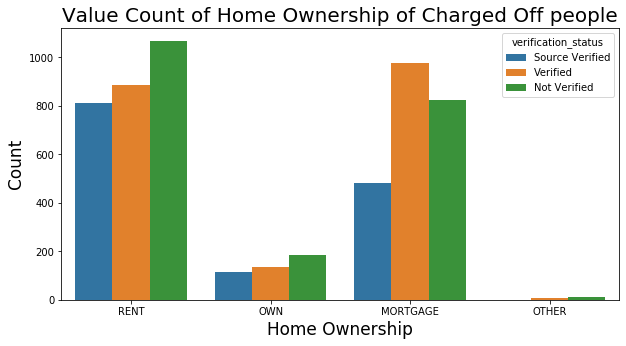

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership',data=df[df['loan_status']=='Charged Off'],hue='verification_status')
plt.title("Value Count of Home Ownership of Charged Off people", fontsize=20)
plt.xlabel("Home Ownership", fontsize=17)
plt.ylabel("Count", fontsize=17)

###### We can see that the people whose home_ownership are RENT and MORTAGE are most like to be charged-off

In [63]:
df.groupby(['term'])['loan_status'].value_counts(normalize=True)

term        loan_status
 36 months  Fully Paid     0.890777
            Charged Off    0.109223
 60 months  Fully Paid     0.747327
            Charged Off    0.252673
Name: loan_status, dtype: float64

###### From the above statestics we can say that the people who are taking for 5 years term are most likely to be charged-off

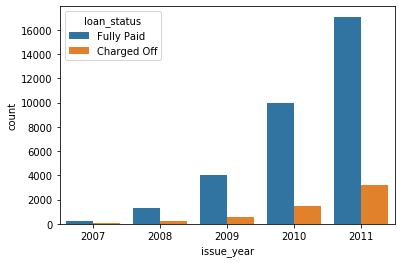

In [64]:
sns.countplot(x='issue_year',hue='loan_status',data=df)

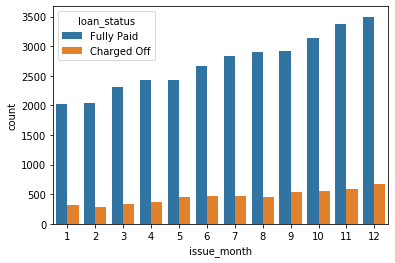

In [65]:
sns.countplot(x='issue_month',hue='loan_status',data=df)

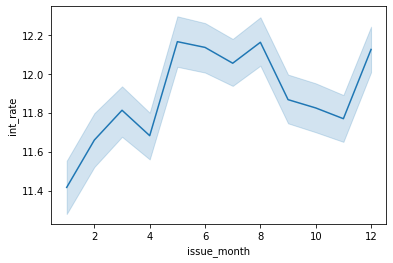

In [66]:
sns.lineplot(x='issue_month',y='int_rate',data=df)

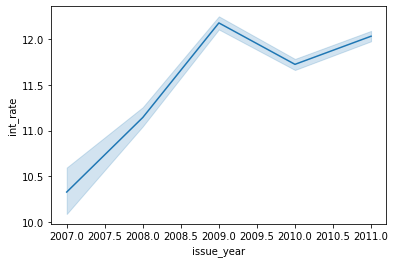

In [67]:
sns.lineplot(x='issue_year',y='int_rate',data=df)

###### From the above lineplot we can see that the after stedy increase of intrest from the year 2007 the intrest rate got decreased from 2009 to 2010. The main reason would be Recession.

Text(0, 0.5, 'Installment')

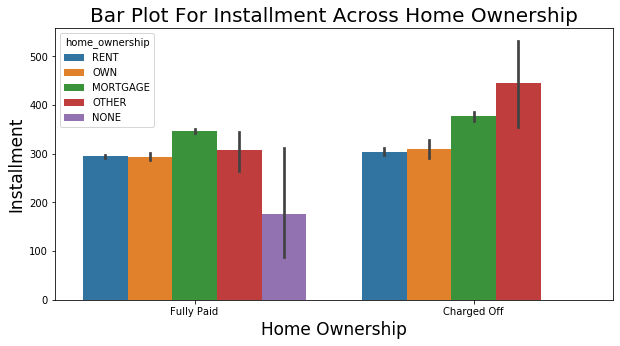

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status', y='installment',hue='home_ownership', data=df)
plt.title("Bar Plot For Installment Across Home Ownership", fontsize=20)
plt.xlabel("Home Ownership", fontsize=17)
plt.ylabel("Installment", fontsize=17)

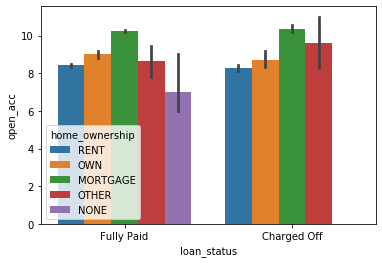

In [69]:
sns.barplot(x='loan_status', y='open_acc',hue='home_ownership', data=df)
plt.show()

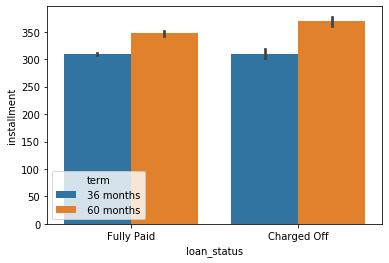

In [70]:
sns.barplot(x='loan_status', y='installment',hue='term', data=df)
plt.show()